<a href="https://colab.research.google.com/github/Lotfullah21/Algorithms_AI/blob/main/grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f(x):
  return 3*x**2 + 12*x


In [4]:
f(4)

96

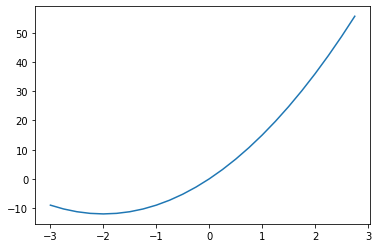

In [5]:
xs = np.arange(-3,3,0.25)
ys = f(xs)
plt.plot(xs,ys)


In [6]:
h = 0.000001
x = 3
(f(x+h)-f(x))/h

30.000003000907327

In [7]:
print(f(x+h),f(x))

63.000030000003 63


In [8]:
# slope
h = 0.0000001
x = -2 # at x = -2, the slop is zero, means going in any direction 
# the value of function won't change.
print(f(x+h)-f(x))
print((f(x+h)-f(x))/h)

3.019806626980426e-14
3.019806626980426e-07


In [9]:
a = -3.0
b = 4.0
c = 8
d = a*b-c
d

-20.0

In [10]:
h = 0.00001
# inputs
a = -3.0
b = 4.0
c = 8
d1 = a*b-c
c = c+h
d2 = a*b-c
print(d1)
print(d2)
print("Slope",(d1-d2)/h)


-20.0
-20.00001
Slope 0.9999999999621422


 Neural Networks are consist of pretty massive expressions, we need to 
 create data structures to maintain these expressions.

In [120]:
class Value:
  def __init__(self,data,_children=(), _op =" ",label =" "):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label
  # repr providing us a nicer looking output
  def __repr__(self):
    return f"value(data = {self.data} ))"
  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),"+")
    return out
  def __mul__(self,other):
    out = Value(self.data * other.data,(self,other),"*")
    return out

a = Value(4,label = "a")
b = Value(-3, label ="b")
c = Value(4, label = "c")
d = a+b; d.label = "d"
# a.__add__(b)
print("a+b",a+b)
# a.__mul__(c)
print("a*c",a*c)
# (a.__mul__(b)).__add__(c)
print("a*b+c",a*b+c)
m = a+b*c; m.label = "m"

a+b value(data = 1 ))
a*c value(data = 16 ))
a*b+c value(data = -8 ))


In [148]:
a = Value(4,label = "a")
b = Value(-3, label ="b")
c = Value(4, label ="c")
d = a+b; d.label = "d"
m = d*c; m.label = "m"
g = Value(-2,label = "g")
y = g*m; y.label = "y"

y.grad = 1.0 # the base case

In [149]:
# Computing derivatives

dy_dy = 1 # the base case

y = m * g; y.label = "y"
y.grad = 1.0
dy_dm = g.data
dy_dg = m.data
g.grad = dy_dg
m.grad = dy_dm


m = c * d; m.label="m"
dm_dc = d.data * dy_dm
dm_dd = c.data * dy_dm
c.grad = dm_dc
d.grad = dm_dd


d = a + b; d.label ="d"
dd_db = dm_dd * 1
dd_da = dm_dd * 1
a.grad = dd_da 
b.grad = dd_db

In [162]:
# gradient shows the direction of stepest decrease,so we will move in the direction of gradient to increase value of y
d.data += -5*d.grad
m.data -= 61*m.grad


m = d*c
y = g*m
print(y)


value(data = 96.0 ))


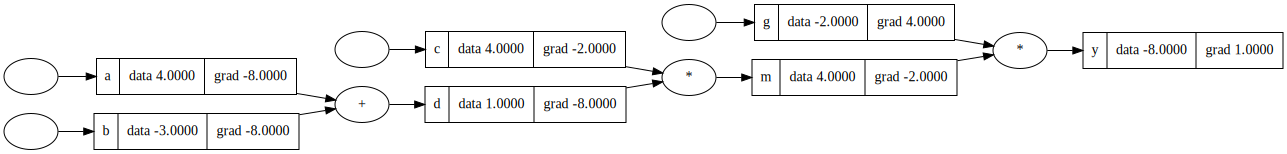

In [144]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

draw_dot(y)

In [131]:
# Computing derivatives

dy_dy = 1 # the base case

y = m * g; y.label = "y"
y.grad = 1.0
dy_dm = g.data
dy_dg = m.data
g.grad = dy_dg
m.grad = dy_dm


m = c * d; m.label="m"
dm_dc = d.data * dy_dm
dm_dd = c.data * dy_dm
c.grad = dm_dc
d.grad = dm_dd


d = a + b; d.label ="d"
dd_db = dm_dd * 1
dd_da = dm_dd * 1
a.grad = dd_da 
b.grad = dd_db

In [130]:
def Slope():
  h = 0.0001
  a = Value(4,label = "a")
  b = Value(-3, label ="b")
  c = Value(4, label = "c")
  d = a+b; d.label = "d"
  m = d*c; m.label = "m"
  g = Value(4,label = "g")
  x = g*m
  x1 = x.data


  a = Value(4,label = "a")
  b = Value(-3, label ="b")
  c = Value(4, label = "c")
  d = a+b; d.label = "d"
  m = d*c; m.label = "m"
  g = Value(4+h,label = "g")
  x = g*m
  x2 = x.data  # this is the base case, the slope will be with respect to itself
  return (x2-x1)/h
Slope()

3.9999999999906777

In [142]:
def slope():
  h = 0.000001
  a = Value(4,label = "a")
  b = Value(-3, label ="b")
  c = Value(4, label = "c")
  d = a+b; d.label = "d"
  m = d*c; m.label = "m"
  g = Value(-2,label = "g")
  x = g*m
  x1 = x.data


  a = Value(4,label = "a")
  b = Value(-3, label ="b")
  c = Value(4, label = "c")
  d = a+b; d.label = "d"
  m = d*c; m.label = "m"
  m.data  = m.data + h
  g = Value(-2,label = "g")
  x = g*m
  x2 = x.data  
  return (x2-x1)/h
slope()

-2.000000000279556